In [5]:
from time import time
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
esrgn_path = "https://www.kaggle.com/models/kaggle/esrgan-tf2/frameworks/TensorFlow2/variations/esrgan-tf2/versions/1"
model = hub.load(esrgn_path)

In [3]:
def preprocessing(img):
    imageSize = (tf.convert_to_tensor(img.shape[:-1]) // 4) * 4
    cropped_image = tf.image.crop_to_bounding_box(img, 0, 0, imageSize[0], imageSize[1])
    return tf.expand_dims(tf.cast(cropped_image, tf.float32), 0)

def srmodel(img):
    new_image = model(preprocessing(img))
    return tf.squeeze(new_image) / 255.0

0.19179654121398926


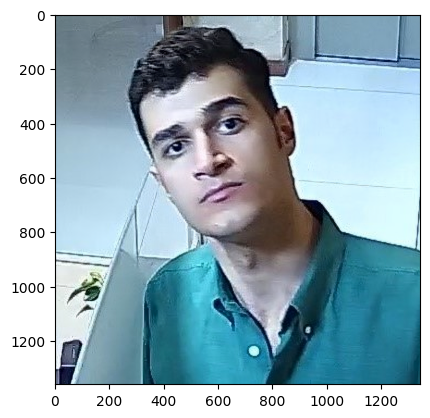

In [8]:
img = np.array(Image.open('1.jpg'))

start = time()
hr_image = srmodel(img)
end = time()

print(end - start)
 
plt.imshow(hr_image)
plt.show()

In [9]:
img.shape

(340, 336, 3)

In [10]:
hr_image.shape

TensorShape([1360, 1344, 3])

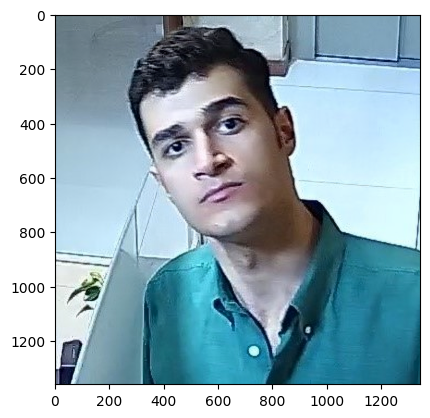

In [11]:
from ESRGAN import ESRGAN_4X

my_class = ESRGAN_4X()
image = my_class.super_res(img)
plt.imshow(image)